# Tranfer Learning TensorFlow

## Creating helper functions


In [ ]:
!wget "https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py"

--2023-07-12 13:34:51--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-07-12 13:34:51 (48.0 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
# Importing helper functions we are going ot use in the colab notebook
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

## Let's get some data

Thsi time we're goind to use the pretrained models within tf.keras.applications adn apply them to our problem


In [ ]:
!wget "https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip"

--2023-07-12 13:34:55--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.128.128, 74.125.143.128, 173.194.79.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.128.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M  39.8MB/s    in 4.2s    

2023-07-12 13:34:59 (37.8 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [ ]:
import zipfile

zip = zipfile.ZipFile("10_food_classes_10_percent.zip")
zip.extractall()
zip.close()

In [ ]:
# Check out how many images and subdirectories and subdirectories are in our folder
import os

for dirpath, dirname, filename in os.walk("10_food_classes_10_percent"):
  print(f"There are {len(dirname)} directories and {len(filename)} images in path {dirpath}")

There are 2 directories and 0 images in path 10_food_classes_10_percent
There are 10 directories and 0 images in path 10_food_classes_10_percent/test
There are 0 directories and 250 images in path 10_food_classes_10_percent/test/steak
There are 0 directories and 250 images in path 10_food_classes_10_percent/test/ramen
There are 0 directories and 250 images in path 10_food_classes_10_percent/test/hamburger
There are 0 directories and 250 images in path 10_food_classes_10_percent/test/fried_rice
There are 0 directories and 250 images in path 10_food_classes_10_percent/test/grilled_salmon
There are 0 directories and 250 images in path 10_food_classes_10_percent/test/pizza
There are 0 directories and 250 images in path 10_food_classes_10_percent/test/sushi
There are 0 directories and 250 images in path 10_food_classes_10_percent/test/chicken_curry
There are 0 directories and 250 images in path 10_food_classes_10_percent/test/ice_cream
There are 0 directories and 250 images in path 10_food_

In [ ]:
# Create training and test directory paths
train_dir = "10_food_classes_10_percent/train"
test_dir = "10_food_classes_10_percent/test"

In [ ]:
import tensorflow as tf
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory = train_dir,
                                                                            image_size = IMG_SIZE ,
                                                                            label_mode= "categorical",
                                                                            batch_size = BATCH_SIZE)
test_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory = test_dir,
                                                                           label_mode = "categorical",
                                                                           batch_size = BATCH_SIZE,
                                                                           image_size = IMG_SIZE)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
train_data_10_percent

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [ ]:
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [ ]:
# seeing an example of a batch of data
for images, labels in train_data_10_percent.take(1):
  print(images, labels)

tf.Tensor(
[[[[2.13627548e+02 2.34984695e+02 1.90913269e+02]
   [2.19000015e+02 2.40000015e+02 1.98193878e+02]
   [2.19076523e+02 2.37841827e+02 1.99153061e+02]
   ...
   [7.89949036e+01 6.43521118e+01 5.35663795e+01]
   [7.69132996e+01 6.29133034e+01 4.99133034e+01]
   [7.61477890e+01 6.21477928e+01 4.91477928e+01]]

  [[2.13836746e+02 2.29979599e+02 1.93693878e+02]
   [2.15923477e+02 2.32066330e+02 1.95051025e+02]
   [2.15969391e+02 2.31571426e+02 1.94770416e+02]
   ...
   [7.92449188e+01 6.33571625e+01 5.03571625e+01]
   [8.23417816e+01 6.92754593e+01 5.34744339e+01]
   [7.98368759e+01 6.68368759e+01 5.05052147e+01]]

  [[1.92469376e+02 2.02250000e+02 1.72821426e+02]
   [2.11433670e+02 2.22061234e+02 1.88076538e+02]
   [2.18729584e+02 2.30255096e+02 1.91015305e+02]
   ...
   [9.20254745e+01 7.45969467e+01 5.88112068e+01]
   [8.05000000e+01 6.75153122e+01 4.99285469e+01]
   [7.54998245e+01 6.29283981e+01 4.32855415e+01]]

  ...

  [[2.04801025e+02 2.16795944e+02 1.73158234e+02]
   [2

# Model 0: Building a transfer learning model using the Keras Functional API

The sequential API is a straight-forward, it runs our layers in sequential order.
But the functional API gives us more flexibility with our models.

In [ ]:
# 1. Building a keras model with tf.keras.applications

base_model = tf.keras.applications.EfficientNetB0(include_top = False)

# 2. Freeze the base model (so the underlying pre-trained patterns aren't updated during training)

base_model.trainable = False

# 3. Create inputs into our model
inputs = tf.keras.layers.Input(shape = (224, 224, 3), name = "input_layer")

# 4. If using ResNet50V2 you will need to normalize inputs
# x = tf.keras.layers.experimental.preprocessing.Rescaling(1/ 255.)(inputs)

# 5. Pass the inputs in the base model
x = base_model(inputs)
print(f"Shape after passing inputs through base mdoel: {x.shape}")

# 6. Average pool the outputs of the base model (aggregae the most important information, reduce number of computations)
x = tf.keras.layers.GlobalAveragePooling2D(name = "global_average_pooling_layer")(x)
print(f"Shape after GolbalAveragePooling2D: {x.shape}")

# 7. Create the output activation layer
outputs = tf.keras.layers.Dense(10, activation = "softmax", name = "output_layer")(x)

# 8. Combine the inputs with the outputs into a model
model_0 = tf.keras.Model(inputs, outputs)

# 9. Compile for the model
model_0.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

# 10. Fit the model and save it's history
history_10_percent = model_0.fit(train_data_10_percent,
            epochs = 5,
            steps_per_epoch = len(train_data_10_percent),
            validation_data = test_data_10_percent,
            validation_steps = int(0.25 * len(test_data_10_percent)),
            callbacks = [create_tensorboard_callback(dir_name = "transfer_learning",
                                                    experiment_name = "10_percent_feature_extraction")])

16705208/16705208 [==============================] - 1s 0us/step
Shape after passing inputs through base mdoel: (None, 7, 7, 1280)
Shape after GolbalAveragePooling2D: (None, 1280)
Saving TensorBoard log files to: transfer_learning/10_percent_feature_extraction/20230712-133511


Epoch 1/5
24/24 [==============================] - 37s 444ms/step - loss: 1.8687 - accuracy: 0.4053 - val_loss: 1.3101 - val_accuracy: 0.7270
Epoch 2/5
24/24 [==============================] - 5s 178ms/step - loss: 1.0871 - accuracy: 0.7813 - val_loss: 0.8867 - val_accuracy: 0.8076
Epoch 3/5
24/24 [==============================] - 5s 170ms/step - loss: 0.7727 - accuracy: 0.8427 - val_loss: 0.7009 - val_accuracy: 0.8586
Epoch 4/5
24/24 [==============================] - 5s 176ms/step - loss: 0.6361 - accuracy: 0.8640 - val_loss: 0.6323 - val_accuracy: 0.8553
Epoch 5/5
24/24 [==============================] - 5s 181ms/step - loss: 0.5367 - accuracy: 0.8960 - val_loss: 0.5739 - val_accuracy: 0.8618


In [ ]:
model_0.evaluate(test_data_10_percent)

79/79 [==============================] - 6s 74ms/step - loss: 0.5513 - accuracy: 0.8644


[0.55129474401474, 0.8644000291824341]

In [ ]:
# Check the layers in our base model
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name)

0 input_1
1 rescaling
2 normalization
3 rescaling_1
4 stem_conv_pad
5 stem_conv
6 stem_bn
7 stem_activation
8 block1a_dwconv
9 block1a_bn
10 block1a_activation
11 block1a_se_squeeze
12 block1a_se_reshape
13 block1a_se_reduce
14 block1a_se_expand
15 block1a_se_excite
16 block1a_project_conv
17 block1a_project_bn
18 block2a_expand_conv
19 block2a_expand_bn
20 block2a_expand_activation
21 block2a_dwconv_pad
22 block2a_dwconv
23 block2a_bn
24 block2a_activation
25 block2a_se_squeeze
26 block2a_se_reshape
27 block2a_se_reduce
28 block2a_se_expand
29 block2a_se_excite
30 block2a_project_conv
31 block2a_project_bn
32 block2b_expand_conv
33 block2b_expand_bn
34 block2b_expand_activation
35 block2b_dwconv
36 block2b_bn
37 block2b_activation
38 block2b_se_squeeze
39 block2b_se_reshape
40 block2b_se_reduce
41 block2b_se_expand
42 block2b_se_excite
43 block2b_project_conv
44 block2b_project_bn
45 block2b_drop
46 block2b_add
47 block3a_expand_conv
48 block3a_expand_bn
49 block3a_expand_activation
5

In [ ]:
# How about we get a summary of the base model?
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling (Rescaling)          (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 normalization (Normalization)  (None, None, None,   7           ['rescaling[0][0]']              
                                3)                                                   

In [ ]:
# How about a summary of our whole model?
model_0.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


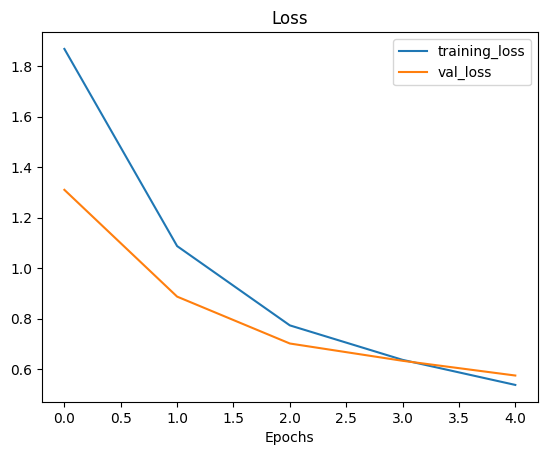

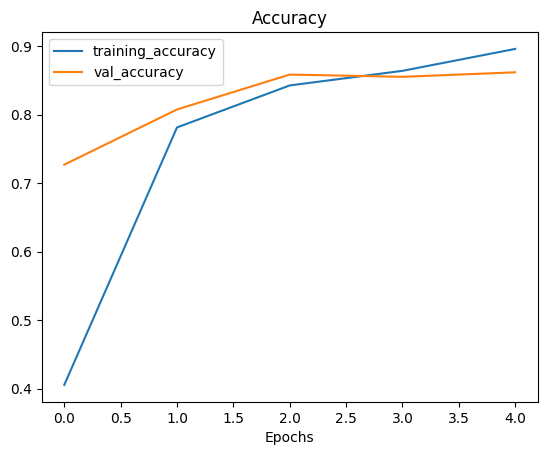

In [ ]:
# Check out our model's loss curves
plot_loss_curves(history_10_percent)

## Geting the feature vector from a trained model

Let's demonstrate the Global Average Pooling 2D layer

We have a tesnor after our model through `base_model` of shape (None, 7, 7, 1280).

But then when it passes through GlobalAveragePooling2D, it turns into (None, 1280)

Let's use a similar shaped tensor of (1, 4, 4, 3) and then pass it to GlobalAveragePooling2D.

In [ ]:
# Define the input shape
input_shape = (1, 4, 4, 3)

# Create a random tensor
tf.random.set_seed(42)
input_tensor = tf.random.normal(input_shape)
print(f"Random input tensor: \n {input_tensor}\n")

# Pass the random tensor through a global average pooling 2D layer
global_average_pooled_tensor = tf.keras.layers.GlobalAveragePooling2D()(input_tensor)
print(f"2D global average pooled random tensor: \n {global_average_pooled_tensor} \n")

# Check the shape of the different tensors
print(f"Shape of the input tensor: {input_tensor.shape}")
print(f"Shape of the Global Average Pooled 2D tensor: {global_average_pooled_tensor.shape}")

Random input tensor: 
 [[[[ 0.3274685  -0.8426258   0.3194337 ]
   [-1.4075519  -2.3880599  -1.0392479 ]
   [-0.5573232   0.539707    1.6994323 ]
   [ 0.28893656 -1.5066116  -0.2645474 ]]

  [[-0.59722406 -1.9171132  -0.62044144]
   [ 0.8504023  -0.40604794 -3.0258412 ]
   [ 0.9058464   0.29855987 -0.22561555]
   [-0.7616443  -1.8917141  -0.93847126]]

  [[ 0.77852213 -0.47338897  0.97772694]
   [ 0.24694404  0.20573747 -0.5256233 ]
   [ 0.32410017  0.02545409 -0.10638497]
   [-0.6369475   1.1603122   0.2507359 ]]

  [[-0.41728503  0.4012578  -1.4145443 ]
   [-0.5931857  -1.6617213   0.33567193]
   [ 0.10815629  0.23479682 -0.56668764]
   [-0.35819843  0.88698614  0.52744764]]]]

2D global average pooled random tensor: 
 [[-0.09368646 -0.45840448 -0.2885598 ]] 

Shape of the input tensor: (1, 4, 4, 3)
Shape of the Global Average Pooled 2D tensor: (1, 3)


In [ ]:
# Let's replicate the GlobalAverage2D
tf.reduce_mean(input_tensor, axis=[1, 2])

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-0.09368646, -0.45840448, -0.2885598 ]], dtype=float32)>

In [ ]:
from keras.layers.pooling.global_max_pooling2d import GlobalMaxPool2D
# Set the shape of the random tensor
input_shape = [1, 4, 4, 3]

# Create a random tensor
tf.random.set_seed(42)
random_tensor = tf.random.normal(input_shape)
print(f"The random input tensor: {random_tensor}")

# Passing the ranom tesnor to the GlobalMaxPool2D layer
Global_max_pooled_tensor = tf.keras.layers.GlobalMaxPool2D()(random_tensor)
print(f"2D global max pooled random tensor: {Global_max_pooled_tensor}")

# pritning the shape fo the tensors
print(f"Shape of the input tensor: {random_tensor.shape}")
print(f"Shape of the Global Max POoled 2D tensor: {Global_max_pooled_tensor.shape}")

The random input tensor: [[[[ 0.3274685  -0.8426258   0.3194337 ]
   [-1.4075519  -2.3880599  -1.0392479 ]
   [-0.5573232   0.539707    1.6994323 ]
   [ 0.28893656 -1.5066116  -0.2645474 ]]

  [[-0.59722406 -1.9171132  -0.62044144]
   [ 0.8504023  -0.40604794 -3.0258412 ]
   [ 0.9058464   0.29855987 -0.22561555]
   [-0.7616443  -1.8917141  -0.93847126]]

  [[ 0.77852213 -0.47338897  0.97772694]
   [ 0.24694404  0.20573747 -0.5256233 ]
   [ 0.32410017  0.02545409 -0.10638497]
   [-0.6369475   1.1603122   0.2507359 ]]

  [[-0.41728503  0.4012578  -1.4145443 ]
   [-0.5931857  -1.6617213   0.33567193]
   [ 0.10815629  0.23479682 -0.56668764]
   [-0.35819843  0.88698614  0.52744764]]]]
2D global max pooled random tensor: [[0.9058464 1.1603122 1.6994323]]
Shape of the input tensor: (1, 4, 4, 3)
Shape of the Global Max POoled 2D tensor: (1, 3)


In [ ]:
tf.reduce_max(random_tensor, axis = [1,2])

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[0.9058464, 1.1603122, 1.6994323]], dtype=float32)>

## Running a series of transfer learning experiments

We've seen the incredible results transfer learning can get with only 10% of the training data, but how does it go with 1% of the training data...

we will conduct some experiments to find that out:
1. `model_1` -use feature extraction transfer learning with 1% fo the training data with data augmentation.
2. `model_2` - use feature extraction with 10% of the training data with data augmention.
3. `model_3` - use fine-tuning transfer learning on 10% of the training data with data augmention.
4. `model_4` - use fine-tuning transfer leraning on 100% of the training data with data augmentation.


In [ ]:
# Downlaod and unzip data
!wget "https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip"

--2023-07-12 13:36:17--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.218.128, 142.251.31.128, 142.251.18.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.218.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M  37.1MB/s    in 3.4s    

2023-07-12 13:36:21 (37.1 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [ ]:
import zipfile

zip = zipfile.ZipFile("10_food_classes_1_percent.zip")
zip.extractall()
zip.close()

In [ ]:
# Create training and test dirs
train_dir_1_percent = "10_food_classes_1_percent/train"
test_dir_1_percent = "10_food_classes_1_percent/test"

In [ ]:
# How many images are we working with
import os

for dirpath, dirname, filename in os.walk("10_food_classes_1_percent"):
  print(f"There are {len(dirname)} directories and {len(filename)} images in the path {dirpath}")

There are 2 directories and 0 images in the path 10_food_classes_1_percent
There are 10 directories and 0 images in the path 10_food_classes_1_percent/test
There are 0 directories and 250 images in the path 10_food_classes_1_percent/test/steak
There are 0 directories and 250 images in the path 10_food_classes_1_percent/test/ramen
There are 0 directories and 250 images in the path 10_food_classes_1_percent/test/hamburger
There are 0 directories and 250 images in the path 10_food_classes_1_percent/test/fried_rice
There are 0 directories and 250 images in the path 10_food_classes_1_percent/test/grilled_salmon
There are 0 directories and 250 images in the path 10_food_classes_1_percent/test/pizza
There are 0 directories and 250 images in the path 10_food_classes_1_percent/test/sushi
There are 0 directories and 250 images in the path 10_food_classes_1_percent/test/chicken_curry
There are 0 directories and 250 images in the path 10_food_classes_1_percent/test/ice_cream
There are 0 directorie

In [ ]:
train_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_1_percent,
                                                                           label_mode = 'categorical',
                                                                           image_size = IMG_SIZE,
                                                                           batch_size = BATCH_SIZE)

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir_1_percent,
                                                                label_mode = 'categorical',
                                                                image_size = IMG_SIZE,
                                                                batch_size = BATCH_SIZE)

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
IMG_SIZE, BATCH_SIZE

((224, 224), 32)

## Adding data augmentiaon right into the model

To add data augmentation right into our models, we can use the layers inside:
* `tf.keras.layers.experimental.preprocessing()`

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

In [ ]:
# Creation of data augmentaion state with horizontal flipping, rotatiaon, zooms, etc
data_augmentation = keras.Sequential([
    preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2)
], name = "data_augmentation")

10_food_classes_1_percent/train/pizza


(-0.5, 551.5, 463.5, -0.5)

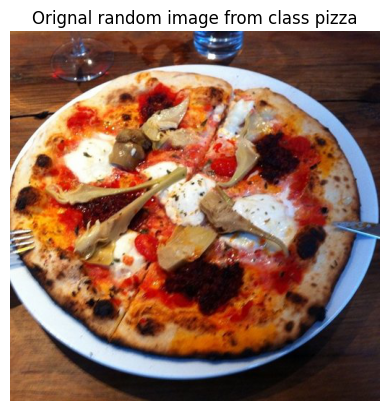

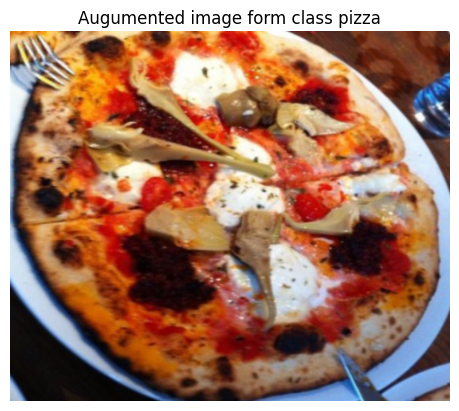

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random

target_class = random.choice(train_data_1_percent.class_names)
target_dir = "10_food_classes_1_percent/train/" + target_class
random_image = random.choice(os.listdir(target_dir))
random_image_path = target_dir + "/" + random_image

# Read in the random image
img = mpimg.imread(random_image_path)
plt.imshow(img)
plt.axis(False)
plt.title(f"Orignal random image from class {target_class}")
print(target_dir)

# Now let's plot our augmented random image
augmented_img = data_augmentation(img)
plt.figure()
plt.imshow(augmented_img/255.)
plt.title(f"Augumented image form class {target_class}")
plt.axis(False)

## Model 1: Feature extraction transfer learning on 1% of the data with data augmentation

In [ ]:
# Setup input shape and base model, freezing the base model layers
input_shape = (224, 224, 3)

base_model = tf.keras.applications.EfficientNetB0(include_top = False)
base_model.trainable = False

# Create input layer
input_layer = layers.Input(shape = input_shape, name = "input_layer")

# Add in data augmentation Sequential model as a layer
x = data_augmentation(inputs)

# Give base_model the inputs (after augmentation) and don't trian it
x = base_model(x, training = False)

# Pool output features of the base model
x = layers.GlobalAveragePooling2D(name = "gobal_average_pooling_layer")(x)

# Put the dense layer on as the output
outputs = layers.Dense(10, activation = "softmax", name = "output_layer")(x)

# Make a model using the inputs and outputs

model_1 = keras.Model(inputs, outputs)

# Compile the model
model_1.compile(loss= "categorical_crossentropy",
                optimizer = "Adam",
                metrics = ["accuracy"])

#Fit the mdoel
history_1_percent = model_1.fit(train_data_1_percent,
            epochs = 5,
            steps_per_epoch = len(train_data_1_percent),
            validation_data = test_data,
            validation_steps = len(test_data),
            callbacks = [create_tensorboard_callback("transfer_learning",
                                                     "1_percent_data_aug")])

Saving TensorBoard log files to: transfer_learning/1_percent_data_aug/20230712-133626
Epoch 1/5
3/3 [==============================] - 21s 6s/step - loss: 2.4185 - accuracy: 0.0857 - val_loss: 2.2317 - val_accuracy: 0.1720
Epoch 2/5
3/3 [==============================] - 8s 3s/step - loss: 2.1217 - accuracy: 0.2286 - val_loss: 2.0960 - val_accuracy: 0.2896
Epoch 3/5
3/3 [==============================] - 7s 3s/step - loss: 1.9458 - accuracy: 0.3429 - val_loss: 1.9816 - val_accuracy: 0.3732
Epoch 4/5
3/3 [==============================] - 7s 3s/step - loss: 1.7832 - accuracy: 0.5286 - val_loss: 1.8814 - val_accuracy: 0.4312
Epoch 5/5
3/3 [==============================] - 7s 3s/step - loss: 1.6179 - accuracy: 0.6571 - val_loss: 1.7897 - val_accuracy: 0.4732


## Model 2: feature extraction transfer learning model


In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential

data_augmentaion = Sequential([
    preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomWidth(0.2)
], name = "data_augmentation_layer")

In [ ]:
# Get 10% data and unzip it
input_shape = (224, 224, 3)

# create the frozen base model or backbone
base_model = tf.keras.applications.EfficientNetB0(include_top = False)
base_model.trainable = False

# Create the input layer
inputs = layers.Input(shape = input_shape, name = "input_layer")

# Add the data augmentation model as the augmentation layer
x = data_augmentation(inputs)

# Add the data augmentation layer to the base_model and set the training to false
x = base_model(x, training = False)

# Pool the outputs using the GlobalAveragePool2D layer
x = layers.GlobalAveragePooling2D()(x)

# Add your own dense layer on top of the model
outputs = layers.Dense(10, activation = 'softmax')(x)

# Make the model with input and outputs
model_2 = keras.Model(inputs, outputs)

# Compile the model
model_2.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])



In [ ]:
model_2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, None, 3)          0         
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling2d_1   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense (Dense)               (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-traina

### Creating a ModelCheckpoint callback

The ModelCheckpoint callback intermediately saves our model(the full model or juct the weights) during training. This is useful so we can come and start at the same point where we left off.


In [ ]:
# Set checkpoint path
checkpoint_path  = "ten_percent_model_checkpoints_weights/checkpoint.ckpt"

# Create a Model Checkpoint callback that saves the model's weights only
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath = checkpoint_path,
                                                         save_weights_only = True,
                                                         save_best_only = False,
                                                         save_freq = "epoch",
                                                         verbose = 1)

In [ ]:
# Fit the model
history_model_2 = model_2.fit(train_data_10_percent,
            epochs = 5,
            steps_per_epoch = len(train_data_10_percent),
            validation_data = test_data,
            validation_steps = int(0.25* len(test_data)),
            callbacks = [checkpoint_callback])

Epoch 1/5
24/24 [==============================] - ETA: 0s - loss: 1.9348 - accuracy: 0.3747
Epoch 1: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 23s 659ms/step - loss: 1.9348 - accuracy: 0.3747 - val_loss: 1.3987 - val_accuracy: 0.6678
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 1.2843 - accuracy: 0.7013
Epoch 2: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 15s 589ms/step - loss: 1.2843 - accuracy: 0.7013 - val_loss: 0.9493 - val_accuracy: 0.7961
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 0.9872 - accuracy: 0.7467
Epoch 3: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 12s 502ms/step - loss: 0.9872 - accuracy: 0.7467 - val_loss: 0.7703 - val_accuracy: 0.8158
Epoch 4/5
24/24 [==============================] - ETA: 0s - loss: 0.8530 - accuracy: 0.

In [ ]:
# Fitting the model for the intial 5 epochs and then other 5 epochs for fine tuning for the other half
initial_epochs = 5
history_model_2 = model_2.fit(train_data_10_percent,
                              epochs = initial_epochs,
                              validation_data = test_data,
                              validation_steps = int(0.25 * len(test_data)),
                              callbacks = [create_tensorboard_callback("transfer_learning",
                                                                       "10_percent_data_aug"),
                                           checkpoint_callback])

Saving TensorBoard log files to: transfer_learning/10_percent_data_aug/20230712-142919
Epoch 1/5
24/24 [==============================] - ETA: 0s - loss: 0.0535 - accuracy: 0.9947
Epoch 1: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 10s 398ms/step - loss: 0.0535 - accuracy: 0.9947 - val_loss: 0.3497 - val_accuracy: 0.8799
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 0.0431 - accuracy: 0.9960
Epoch 2: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 9s 349ms/step - loss: 0.0431 - accuracy: 0.9960 - val_loss: 0.3748 - val_accuracy: 0.8717
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 0.0406 - accuracy: 0.9973
Epoch 3: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 9s 363ms/step - loss: 0.0406 - accuracy: 0.9973 - val_loss: 0.3766 - val_accuracy: 0.8635
Epo

In [ ]:
model_0.evaluate(test_data), model_2.evaluate(test_data)

79/79 [==============================] - 6s 70ms/step - loss: 0.3525 - accuracy: 0.8868


([0.5512946844100952, 0.8644000291824341],
 [0.35247915983200073, 0.8867999911308289])

In [ ]:
results_10_percent_data_aug = model_2.evaluate(test_data)

79/79 [==============================] - 7s 84ms/step - loss: 0.3525 - accuracy: 0.8868


In [ ]:
results_1_percent_data_aug =model_1.evaluate(test_data)

79/79 [==============================] - 7s 84ms/step - loss: 1.7897 - accuracy: 0.4732


In [ ]:
results_1_percent_data_aug

[1.7896578311920166, 0.4731999933719635]

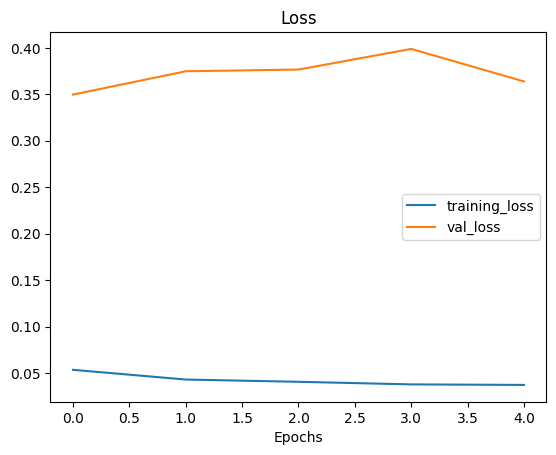

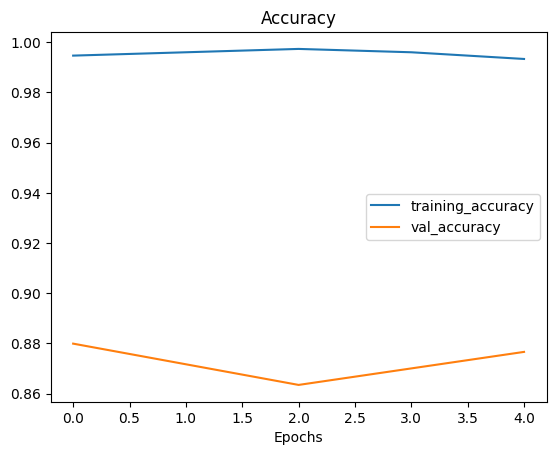

In [ ]:
plot_loss_curves(history_model_2)

### Loading in checkpointed weights

Loading in checkpointed weights returns a model to a specific checkpoint

In [ ]:
# Load in saved model weights and evaluate model
model_2.load_weights(checkpoint_path)

In [ ]:
# Evaluate model_2 with loaded weights
loaded_weights_model_results = model_2.evaluate(test_data)

79/79 [==============================] - 6s 71ms/step - loss: 0.3525 - accuracy: 0.8868


In [ ]:
# If the results from our previously evaluated model 2 match the loaded weights then everything has worked
results_10_percent_data_aug == loaded_weights_model_results

False

In [ ]:
results_10_percent_data_aug

[0.35247907042503357, 0.8867999911308289]

In [ ]:
loaded_weights_model_results

[0.3524790406227112, 0.8867999911308289]

In [ ]:
# Check to see if loaded model results are very close to our previous non-loaded model results
import numpy as np
np.isclose(np.array(results_10_percent_data_aug), np.array(loaded_weights_model_results))

array([ True,  True])

In [ ]:
# Check the difference between the two results
print(np.array(results_10_percent_data_aug)-np.array(loaded_weights_model_results))

[2.98023224e-08 0.00000000e+00]


## Model 3: Fine-tuning an existing model on 10% of the data using fine tuning

**Note:** Fine-tuning usually works best *after* training a feature extraction model for a few epochs with large amount of custom data.

In [ ]:
# Layers in loaded model
model_2.layers

In [ ]:
# Are these layers trainable?
for layer in model_2.layers:
  print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7fccbf531900> True
<keras.engine.sequential.Sequential object at 0x7fccbef15b40> True
<keras.engine.functional.Functional object at 0x7fcd624796f0> True
<keras.layers.pooling.global_average_pooling2d.GlobalAveragePooling2D object at 0x7fccbef16050> True
<keras.layers.core.dense.Dense object at 0x7fccb4d7dde0> True


In [ ]:
for i, layer in enumerate(model_2.layers[2].layers):
  print(i, layer.name, layer.trainable)

0 input_3 False
1 rescaling_4 False
2 normalization_2 False
3 rescaling_5 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze Fals

In [ ]:
# How many trainabe variables are in our base model?
print(len(model_2.layers[2].trainable_variables))

10


In [ ]:
# To begin fine tuning, let's start by setting the last 10 layers of our base_model.trainable = True
base_model.trainable = True

# Freeze all layers except for the last 10
for layer in base_model.layers[:-10]:
  layer.trainable = False

# Recompile (we have to recompile our models every time we make a change)
model_2.compile(loss="categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001),# when fine tuning you typically want to lower the learning rate by 10x
                metrics = ["accuracy"])

In [ ]:
# Now we have unfrozen some of the layers closer to the top, how many trainable variables are there?
print(len(model_2.trainable_variables))

12


In [ ]:
model_2.trainable_variables

[<tf.Variable 'block7a_se_reduce/kernel:0' shape=(1, 1, 1152, 48) dtype=float32, numpy=
 array([[[[-0.05526693,  0.06851672,  0.0086989 , ..., -0.06058101,
            0.03548106, -0.02406113],
          [-0.03636364,  0.02689386, -0.06040478, ...,  0.03769758,
            0.11636309, -0.05481817],
          [-0.07590078,  0.13548182,  0.05527842, ...,  0.02513314,
           -0.01423205,  0.12888768],
          ...,
          [-0.06292906,  0.1977958 ,  0.15841188, ...,  0.02618197,
           -0.05983937, -0.09032796],
          [ 0.00235495,  0.06775111,  0.03979678, ..., -0.03604187,
           -0.10929384, -0.00081163],
          [ 0.03674437, -0.02265452,  0.03857739, ...,  0.01335543,
           -0.06623767, -0.06983288]]]], dtype=float32)>,
 <tf.Variable 'block7a_se_reduce/bias:0' shape=(48,) dtype=float32, numpy=
 array([-0.11900366, -0.14440216, -0.1479169 ,  0.15599802, -0.08798298,
        -0.1157257 , -0.08921134, -0.08266854, -0.0790706 , -0.13561353,
        -0.0799891 ,

In [ ]:
# Fine tune for another 5 epochs
fine_tune_epochs = initial_epochs + 5

# Refit the model (same as model_2 except with more trainable layers)
history_fine_10_percent_data_aug = model_2.fit(train_data_10_percent,
                                               epochs = fine_tune_epochs,
                                               steps_per_epoch = len(train_data_10_percent),
                                               validation_data = test_data,
                                               validation_steps = int(0.25 * (len(test_data))),
                                               initial_epoch = history_model_2.epoch[-1],
                                               callbacks = [create_tensorboard_callback("transfer_lerning", "10_percent_fine_tune_last_10")])

Saving TensorBoard log files to: transfer_lerning/10_percent_fine_tune_last_10/20230712-143047
Epoch 5/10
24/24 [==============================] - 21s 426ms/step - loss: 0.0296 - accuracy: 0.9960 - val_loss: 0.4198 - val_accuracy: 0.8553
Epoch 6/10
24/24 [==============================] - 10s 412ms/step - loss: 0.0180 - accuracy: 0.9987 - val_loss: 0.4206 - val_accuracy: 0.8766
Epoch 7/10
24/24 [==============================] - 9s 354ms/step - loss: 0.0196 - accuracy: 0.9973 - val_loss: 0.3914 - val_accuracy: 0.8832
Epoch 8/10
24/24 [==============================] - 9s 335ms/step - loss: 0.0345 - accuracy: 0.9867 - val_loss: 0.4581 - val_accuracy: 0.8618
Epoch 9/10
24/24 [==============================] - 7s 272ms/step - loss: 0.0151 - accuracy: 0.9973 - val_loss: 0.4421 - val_accuracy: 0.8635
Epoch 10/10
24/24 [==============================] - 9s 372ms/step - loss: 0.0183 - accuracy: 0.9973 - val_loss: 0.4409 - val_accuracy: 0.8750


In [ ]:
# Evaluate the fine-tuned model(model_3 which is actually model_2 fine_tuned for another 5 epochs)
results_fine_tune_10_percent = model_2.evaluate(test_data)

79/79 [==============================] - 7s 80ms/step - loss: 0.4049 - accuracy: 0.8888


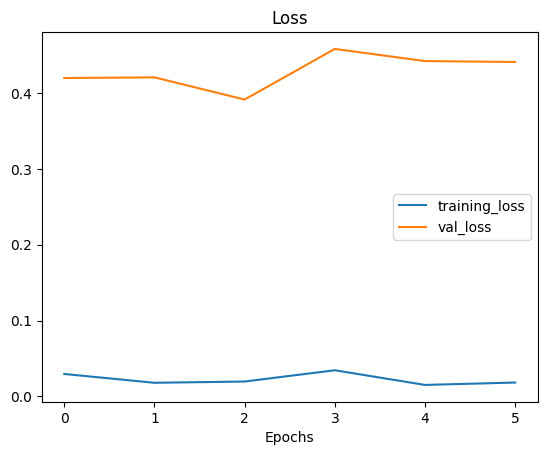

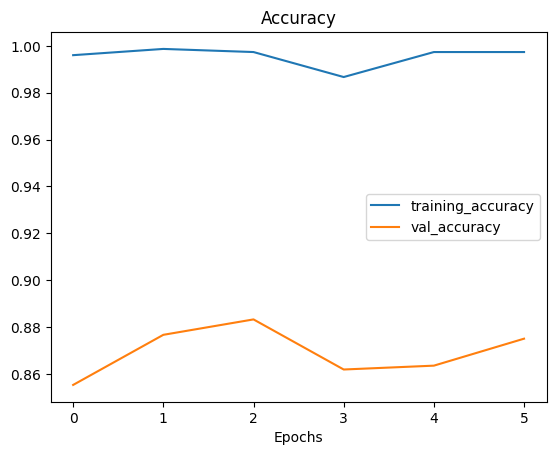

In [ ]:
# Check out the loss curves of our fine tuned model
plot_loss_curves(history_fine_10_percent_data_aug)

In [ ]:
# creating a loss function to compare the training histories
def compare_historys(original_history, new_history, initial_epochs = 5):
  acc = original_history.history["accuracy"]
  loss = original_history.history["loss"]

  val_acc = original_history.history["val_accuracy"]
  val_loss = original_history.history["val_loss"]

  total_acc = acc + new_history.history["accuracy"]
  total_loss = loss + new_history.history["loss"]

  total_val_acc = val_acc + new_history.history["val_accuracy"]
  total_val_loss = val_loss + new_history.history["val_loss"]

  # Make plots
  plt.figure(figsize = (8,8))
  plt.subplot(2,1, 1)
  plt.plot(total_acc, label = "Training Accuracy")
  plt.plot(total_val_acc, label = "Val Accuracy")
  plt.plot([initial_epochs-1, initial_epochs-1], plt.ylim(), label = "Start Fine Tuning")
  plt.legend(loc = "lower right")
  plt.title("Training and Validataion Accuracy")


  plt.figure(figsize = (8,8))
  plt.subplot(2,1, 1)
  plt.plot(total_loss, label = "Training loss")
  plt.plot(total_val_loss, label = "Val loss")
  plt.plot([initial_epochs-1, initial_epochs-1], plt.ylim(), label = "Start Fine Tuning")
  plt.legend(loc = "lower right")
  plt.title("Training and Validataion loss")

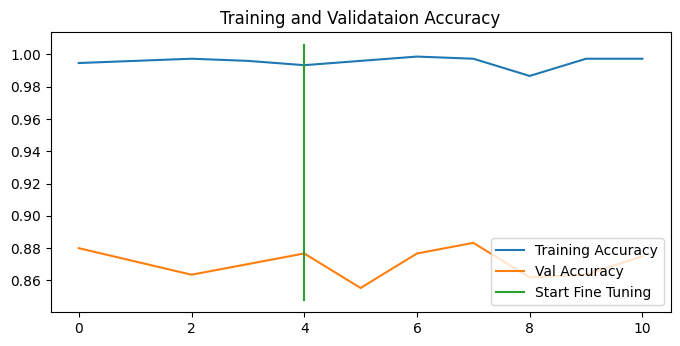

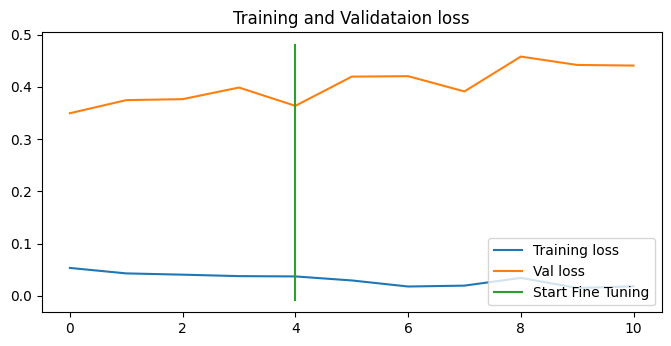

In [ ]:
compare_historys(history_model_2,
                 history_fine_10_percent_data_aug,
                 initial_epochs = 5)

## Fine tuning the existing model on all of the data

In [ ]:
# Download and unzip 10 classes of Food1001 data with all of the images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

import zipfile
zip = zipfile.ZipFile("10_food_classes_all_data.zip")
zip.extractall()
zip.close

--2023-07-12 14:32:06--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.69.128, 173.194.79.128, 108.177.119.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.69.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip.1’

10_food_classes_all 100%[===================>] 495.13M  41.1MB/s    in 13s     

2023-07-12 14:32:20 (37.4 MB/s) - ‘10_food_classes_all_data.zip.1’ saved [519183241/519183241]



<bound method ZipFile.close of <zipfile.ZipFile filename='10_food_classes_all_data.zip' mode='r'>>

In [ ]:
import os

for dirpath, dirname, filename in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirname)} directories and {len(filename)} images in the dirpath {dirpath}")

There are 2 directories and 0 images in the dirpath 10_food_classes_all_data
There are 10 directories and 0 images in the dirpath 10_food_classes_all_data/test
There are 0 directories and 250 images in the dirpath 10_food_classes_all_data/test/steak
There are 0 directories and 250 images in the dirpath 10_food_classes_all_data/test/ramen
There are 0 directories and 250 images in the dirpath 10_food_classes_all_data/test/hamburger
There are 0 directories and 250 images in the dirpath 10_food_classes_all_data/test/fried_rice
There are 0 directories and 250 images in the dirpath 10_food_classes_all_data/test/grilled_salmon
There are 0 directories and 250 images in the dirpath 10_food_classes_all_data/test/pizza
There are 0 directories and 250 images in the dirpath 10_food_classes_all_data/test/sushi
There are 0 directories and 250 images in the dirpath 10_food_classes_all_data/test/chicken_curry
There are 0 directories and 250 images in the dirpath 10_food_classes_all_data/test/ice_cream


In [ ]:
train_dir_all_data = "10_food_classes_all_data/train"
test_dir = "10_food_classes_all_data/test"

In [ ]:
# Setup data inputs
import tensorflow as tf

IMG_SIZE = (224, 224)
train_data_10_classes_full = tf.keras.preprocessing.image_dataset_from_directory(train_dir_all_data,
                                                                                label_mode = "categorical",
                                                                                image_size = IMG_SIZE)
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                               label_mode = "categorical",
                                                               image_size = IMG_SIZE)

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
# Evaluate model 2
model_2.evaluate(test_data)

79/79 [==============================] - 7s 71ms/step - loss: 0.4049 - accuracy: 0.8888


[0.40490487217903137, 0.8888000249862671]

In [ ]:
results_fine_tune_10_percent

[0.40490490198135376, 0.8888000249862671]

To train a fine-tuning model (model_4) we need to revert model_2 back to its feature extraction weights

In [ ]:
# Load weights form checkpoint, that way we can fine tune from
# the same stage the 10 percent data model was fine-tunded from

# model_2.load_weights(checkpoint_path)
checkpoint_path
model_2.load_weights(checkpoint_path)

In [ ]:
# Let's evaluate the model_2 now
model_2.evaluate(test_data)

79/79 [==============================] - 7s 88ms/step - loss: 0.3525 - accuracy: 0.8868


[0.3524790406227112, 0.8867999911308289]

In [ ]:
results_10_percent_data_aug

[0.35247907042503357, 0.8867999911308289]

In [ ]:
# Check which layers are tunabel in the whole model
for layer_number, layer in enumerate(model_2.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_layer True
1 data_augmentation True
2 efficientnetb0 True
3 global_average_pooling2d_1 True
4 dense True


In [ ]:
# Let's drill into our base_model (efficientnetb0) and see what layers are trainabel
for layer_number, layer in enumerate(model_2.layers[2].layers):
  print(layer_number, layer.name, layer.trainable)

0 input_3 False
1 rescaling_4 False
2 normalization_2 False
3 rescaling_5 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze Fals

In [ ]:
# Compile the model
model_2.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics = ["accuracy"])

In [ ]:
# Continue to train and fine-tune the model to our data (100% of training data)
fine_tune_epochs = initial_epochs + 5

history_fine_10_classes_full = model_2.fit(train_data_10_classes_full,
                                           epochs = fine_tune_epochs,
                                           validation_data = test_data,
                                           validation_steps = int(0.25 * len(test_data)),
                                           initial_epoch = history_model_2.epoch[-1],
                                           callbacks = [create_tensorboard_callback(dir_name = "transfer_learning",
                                                                                    experiment_name = "full_10_classes_fine_fune_last_10")])

Saving TensorBoard log files to: transfer_learning/full_10_classes_fine_fune_last_10/20230712-143616
Epoch 5/10
235/235 [==============================] - 47s 198ms/step - loss: 0.4344 - accuracy: 0.8611 - val_loss: 0.2743 - val_accuracy: 0.8997
Epoch 6/10
235/235 [==============================] - 45s 189ms/step - loss: 0.3913 - accuracy: 0.8745 - val_loss: 0.2756 - val_accuracy: 0.8964
Epoch 7/10
235/235 [==============================] - 43s 183ms/step - loss: 0.3505 - accuracy: 0.8889 - val_loss: 0.2630 - val_accuracy: 0.9079
Epoch 8/10
235/235 [==============================] - 45s 188ms/step - loss: 0.3213 - accuracy: 0.8971 - val_loss: 0.2573 - val_accuracy: 0.9079
Epoch 9/10
235/235 [==============================] - 40s 168ms/step - loss: 0.2904 - accuracy: 0.9075 - val_loss: 0.2491 - val_accuracy: 0.9030
Epoch 10/10
235/235 [==============================] - 39s 162ms/step - loss: 0.2810 - accuracy: 0.9088 - val_loss: 0.2441 - val_accuracy: 0.9145


In [ ]:
!nvidia-smi

Wed Jul 12 14:59:00 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P0    27W /  70W |   2951MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# Let's evaluate on all of the test data
results_fine_tune_full_data = model_2.evaluate(test_data)
results_fine_tune_full_data

79/79 [==============================] - 7s 78ms/step - loss: 0.2544 - accuracy: 0.9168


[0.25436487793922424, 0.9168000221252441]

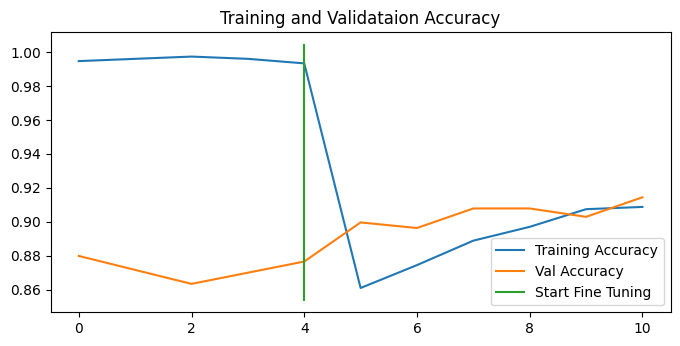

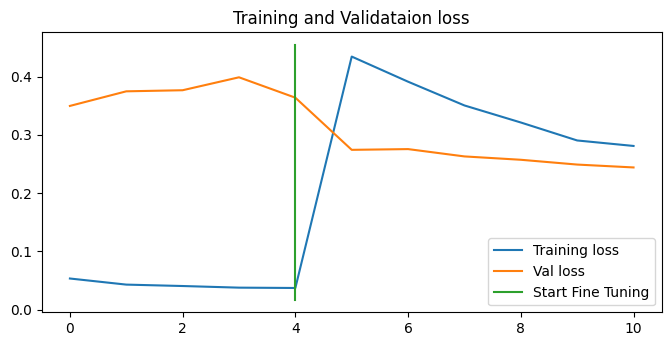

In [ ]:
# How did fine-tuning go with more data?
compare_historys(original_history = history_model_2,
                new_history = history_fine_10_classes_full,
                initial_epochs = 5)